In [1]:
from selenium import webdriver
from pyvirtualdisplay import Display
from bs4 import BeautifulSoup as BS
from PIL import Image
import io
import os
import re
import base64
import numpy as np
import pytesseract

In [2]:
import pandas as pd

In [3]:
display = Display(visible=0, size=(1024, 768))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1049'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1049'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [4]:
driver = webdriver.Firefox()

In [5]:
home_page = 'http://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do'
driver.get(home_page)

In [6]:
driver.find_element_by_xpath('//input[@name="selCmpyType"][@value="1"]').click()

In [8]:
driver.find_element_by_xpath('//input[@name="selQueryType"][@value="2"]').click()

In [9]:
driver.find_element_by_name('queryStr').send_keys('25022092')

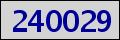

In [10]:
capt_b64 = driver.find_element_by_id('kaptcha').screenshot_as_base64
capt_img = Image.open(io.BytesIO(base64.b64decode(capt_b64)))
capt_img

In [11]:
capt_str = pytesseract.image_to_string(capt_img)
capt_str = ('').join(re.findall("[0-9]",capt_str))#('').join(capt_str.split(' '))
capt_str

'240029'

In [12]:
driver.find_element_by_name('imageCode').send_keys(capt_str)

In [13]:
driver.find_element_by_name('submitData').click()

In [35]:
#driver.back()

In [14]:
driver.find_element_by_css_selector(".w-13c a").click()

In [26]:
#driver.find_element_by_xpath("//a[@href='/pub/cmpy/cmpyInfoAction.do?method=detail&banNo=]").click()

In [15]:
with open("captcha_data/%s.png"%capt_str,"wb") as capt:
    capt.write(base64.b64decode(capt_b64))

In [16]:
soup = BS(driver.page_source,"lxml")

In [50]:
#! conda install html5lib -y

In [23]:
#pd.read_html(driver.page_source)[4]#, flavor='html5lib')

In [26]:
for td in soup.select(".interval_bgcolor td"):
    print(td.text)

 
統一編號
25022092

						

 
公司狀況

            核准設立
 
            
(備註)

 
公司名稱

            家有生物科技有限公司

            

                              「工商憑證申請」
                              「工商憑證開卡」
			「廠商英文名稱查詢(限經營出進口或買賣業務者)」本項查詢服務係連結至本部國際貿易局 > 出進口廠商管理系統 > 廠商資料查詢網站，使用本服務或資料內容有疑慮，請與該局出進口廠商登記相關業務聯絡窗口聯絡。出進口廠商登記相關業務聯絡窗口：貿易服務組：(02)2397-7358、(02)2397-7353、(02)2397-7360、(02)2397-7359高雄辦事處：(07)2711-171 分機218已了解，開始查詢關閉



已了解，開始查詢
已了解，開始查詢

關閉
關閉
 
資本總額(元)
5,000,000
 
代表人姓名

						
						楊有家

						
					
 
公司所在地

						
			            雲林縣斗六市興華街1-3號
  
						




 
登記機關
經濟部中部辦公室

 
核准設立日期
098年08月28日

 
最後核准變更日期
104年12月09日

 

						所營事業資料

(新版所營事業代碼對照查詢)






                    C802100 
                    化粧品製造業

                    
                 



                    F102040 
                    飲料批發業

                    
                 



                    F102170 
                    食品什貨批發業

                    
                 



                    F104110 
                 

In [ ]:
# change page to each tab with tab10,20,30,40,50
#driver.find_element_by_id("tab20.div").click()

In [40]:
driver.save_screenshot('quicklook.jpg')

True